In [1]:
from IPython.display import HTML
HTML(open("../style.css", "r").read())

# Overfitting in Linear Regression (with Scikit-Learn)

In this notebook, we demonstrate **overfitting** using the **Hitters** dataset (baseball statistics).

We will incrementally add features to our model, starting with the most "important" ones, to see how the model's performance changes on the **Training Set** versus the **Test Set**.

We will use the **Scikit-Learn** (`sklearn`) library, which is the industry standard for machine learning in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

### 1. Data Loading and Preprocessing

We use the `pandas` library to load the data. `pandas` is excellent for handling tabular data (DataFrames).

In [2]:
# Download the file
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ISLR/Hitters.csv"
urllib.request.urlretrieve(url, "Hitters.csv")

# Load into a DataFrame
df = pd.read_csv("Hitters.csv")
df

,rownames,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


Drop the name column.

In [3]:
df = df.drop(columns=["rownames"])

Drop rows where the target `Salary` is missing, i.e. has the value `NaN`.

In [4]:
df = df.dropna(subset=['Salary'])
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


#### One-Hot Encoding
Machine Learning models generally require numerical input. Our dataset contains categorical text data (e.g., `League` is 'A' or 'N'). We use `pd.get_dummies` to convert these into numbers (0 or 1).

In [5]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,False,True,False


### 2. Feature Sorting by Importance

Before we train, we want to determine which features are the most important.
A simple heuristic for "importance" in linear regression is the **correlation** between a feature and the target variable.

- We calculate the correlation matrix.
- We sort the features based on the absolute value of their correlation with `Salary`.

Calculate the correlation Matrix.

In [6]:
correlations = df.corr()['Salary'].abs().sort_values(ascending=False)
correlations

Salary         1.000000
CRBI           0.566966
CRuns          0.562678
CHits          0.548910
CAtBat         0.526135
CHmRun         0.524931
CWalks         0.489822
RBI            0.449457
Walks          0.443867
Hits           0.438675
Runs           0.419859
Years          0.400657
AtBat          0.394771
HmRun          0.343028
PutOuts        0.300480
Division_W     0.192514
Assists        0.025436
League_N       0.014282
Errors         0.005401
NewLeague_N    0.002834
Name: Salary, dtype: float64

Drop the feature `Salary` from the list.

In [7]:
sorted_features = correlations.drop('Salary').index.tolist()

In [8]:
print("Features sorted by importance (Correlation with Salary):")
for i, f in enumerate(sorted_features):
    print(f"{i+1}. {f} ({correlations[f]:.4f})")

Features sorted by importance (Correlation with Salary):
1. CRBI (0.5670)
2. CRuns (0.5627)
3. CHits (0.5489)
4. CAtBat (0.5261)
5. CHmRun (0.5249)
6. CWalks (0.4898)
7. RBI (0.4495)
8. Walks (0.4439)
9. Hits (0.4387)
10. Runs (0.4199)
11. Years (0.4007)
12. AtBat (0.3948)
13. HmRun (0.3430)
14. PutOuts (0.3005)
15. Division_W (0.1925)
16. Assists (0.0254)
17. League_N (0.0143)
18. Errors (0.0054)
19. NewLeague_N (0.0028)


### 3. Splitting the Data

We use `train_test_split` from `sklearn.model_selection`.

**Explanation of the function:**
- `train_test_split(X, y, test_size=..., random_state=...)`: This function randomly shuffles the data and splits it into two buckets.
- `test_size=0.5`: We set a very large test set (and consequently a **small training set**) to intentionally make it easier to overfit the model for this demonstration.
- `random_state=42`: Ensures the split is reproducible (we get the same random split every time we run the code).

In [9]:
from sklearn.model_selection import train_test_split

X = df[sorted_features]  # Features ordered by importance
y = df['Salary']         # Target

# Split the data
# We keep only 50 samples for training to simulate a 'low data' scenario where overfitting is common
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples:     {X_test.shape[0]}")

Training samples: 50
Test samples:     213


### 4. The Experiment

We will now loop through our sorted features. In each iteration $k$, we utilize the top $k$ features to train a linear regression model.

**Explanation of Scikit-Learn functions used:**
1.  `LinearRegression()`: Creates an instance of the model. It is mathematically equivalent to solving the Normal Equation.
2.  `.fit(X, y)`: This trains the model. It finds the optimal weights $\beta$ that minimize the error on the given data `X` and `y`.
3.  `.score(X, y)`: This evaluates the model. For regression, it returns the $R^2$ score (Coefficient of Determination). $1.0$ is perfect, $0.0$ is equivalent to guessing the mean.

In [10]:
from sklearn.linear_model import LinearRegression

train_scores = []
test_scores = []
num_features = []

# Iterate from using 1 feature to using all 19 features
for k in range(1, len(sorted_features) + 1):
    # Select the top k features
    top_k_features = sorted_features[:k]
    
    X_train_k = X_train[top_k_features]
    X_test_k  = X_test[top_k_features]
    
    # 1. Create the model
    model = LinearRegression()
    
    # 2. Train the model (Fit)
    model.fit(X_train_k, y_train)
    
    # 3. Evaluate the model (Score)
    # We record accuracy on both the data it studied (Train) and the data it hasn't seen (Test)
    r2_train = model.score(X_train_k, y_train)
    r2_test  = model.score(X_test_k, y_test)
    
    train_scores.append(r2_train)
    test_scores.append(r2_test)
    num_features.append(k)

### 5. Visualization

We plot the training and test scores. 

**What to look for:**
- The **Training Score** (Blue) should generally go up. Adding information allows the model to explain the specific training data better.
- The **Test Score** (Red) will eventually peak and then drop. This drop indicates **overfitting**: the model is using the additional (less important) features to memorize noise in the training set, which hurts its ability to predict real salaries.

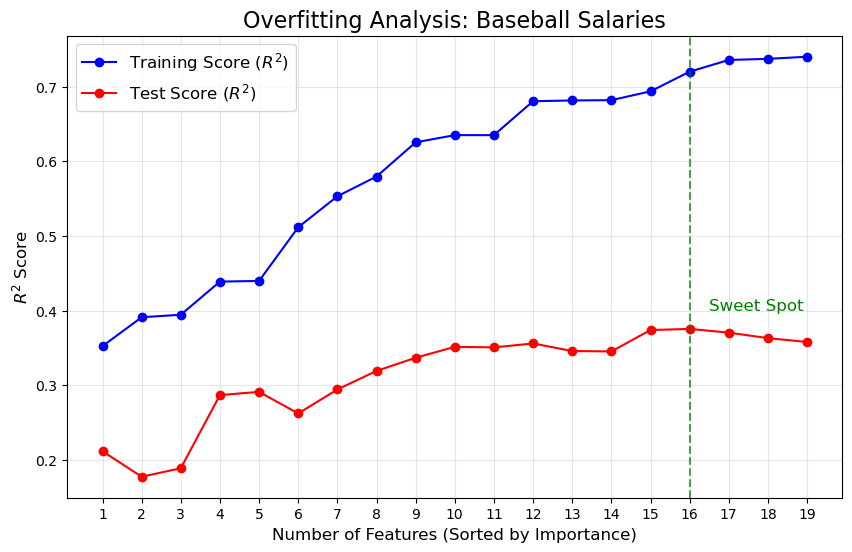

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(num_features, train_scores, 'o-', color='blue', label='Training Score ($R^2$)')
plt.plot(num_features, test_scores, 'o-', color='red', label='Test Score ($R^2$)')

plt.title('Overfitting Analysis: Baseball Salaries', fontsize=16)
plt.xlabel('Number of Features (Sorted by Importance)', fontsize=12)
plt.ylabel('$R^2$ Score', fontsize=12)
plt.xticks(num_features)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Annotate the "Sweet Spot"
best_k = np.argmax(test_scores) + 1
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.7)
plt.text(best_k + 0.5, 0.4, 'Sweet Spot', color='green', fontsize=12)

plt.show()